# Pour effectuer ce TME (et les suivants)
- le notebook comment par importer un fichier `tme1.py` que vous devez créer et dans lequel vous devez écrire vos fonctions et vos commentaires;
- les lignes `autoreload` permettent que l'environnement d'exécution du notebook recharge le fichier `tme1.py` à chaque modification;
- n'hésitez pas à "restart kernel" de temps en temps et à ré-exécuter l'ensemble du notebook;
- il faudra soumettre uniquement le fichier tme1.py qui contiendra en première ligne les noms de ses auteurs;
- le fichier pdf fourni contient le notebook version finale (avec tous les résultats demandés).

In [1]:
%load_ext autoreload
%autoreload 2
import tme1

# TME sur les données blablacar

**Ce fichier est le fichier de travail**, l'autre fichier blablacar est donné pour information et pour montrer comment les données ont été collectées.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pkl

## Chargement des données

Les données sont stockées au format pickle (code fourni ci-dessous):

1. Importer le module : import `pickle as pkl`
1. Charger les données avec `load`
1. La structure est un dictionnaire, les données sont dans le champ `data`
1. La description des colonnes est dans `indexcol`

In [3]:
# chargement des données
fich = pkl.load( open('donnees_blablacar.pkl', 'rb'))

# {'indexcol': cols , 'data':pp2db, 'villes': villes, 'marques':marques }
titles_col = fich['indexcol']
print(len(titles_col), titles_col) 
data = fich['data']
print(data.shape)
dico_villes = fich['villes']
dico_marques = fich['marques']
print(dico_marques)

14 ['annee', 'mois', 'jour', 'heure', 'dep_ville', 'arr_ville', 'dep_coord_x', 'dep_coord_y', 'arr_coord_x', 'arr_coord_y', 'prix', 'marque', 'stars_confort', 'distance']
(6428, 14)
{'FORD': 6, 'BMW': 12, 'ISUZU': 32, 'OPEL': 1, 'LAND ROVER': 28, 'LIDER': 33, 'DS': 2, 'AUDI': 49, 'DACIA': 45, 'JAGUAR': 39, 'TOYOTA': 13, 'SUZUKI': 20, 'HUNDAI': 42, 'CITROEN': 17, 'IVECO': 8, 'RENAULT': 15, 'SKODA': 27, 'ROVER': 19, 'MITSUBISHI': 5, 'MERCEDES-BENZ': 35, 'DODGE': 29, 'ALFA ROMEO': 37, 'CHEVROLET': 26, 'LANCIA': 10, 'INFINITI': 36, 'DAEWOO': 30, 'MIETWAGEN': 38, 'VOLKSWAGEN': 3, 'LADA': 0, 'GOLF': 4, 'PORSCHE': 23, 'NISSAN': 40, 'unknown': 43, 'SSANGYONG': 34, 'FIAT': 50, 'SAAB': 14, 'CHRYSLER': 51, 'JEEP': 9, 'TESLA': 47, 'PEUGEOT': 25, 'MERCEDES BENZ': 48, 'MAZDA': 31, 'HONDA': 53, 'RANGE ROVER': 11, 'SMART': 24, 'KIA': 52, 'VOLVO': 46, 'LEXUS': 44, 'SUBARU': 18, 'SEAT': 16, 'MINI': 7, 'SUV LEXUS': 21, 'MERCEDES': 41, 'HYUNDAI': 22}


## Discrétisation et histogramme

Nous nous intéressons à la variable `distance` (dernière colonne). Nous allons procéder de la manière suivante:
1. Analyse rapide de la variable aléatoire: calcul de la moyenne et de l'écart-type
1. Analyse plus fine (1): affichage des 10 quantiles
1. Analyse plus fine (2): discrétisation de la variable en 10 intervalles de largeur constante & comptage des effectifs dans chaque catégorie (= construction d'un histogramme)
 - Construire l'histogramme à la main. (1) calculer les bornes des intervalles puis (2) utiliser `np.where` pour déterminer les effectifs dans chaque classe. Utiliser `plt.bar` pour l'affichage.
 - Vérifier vos résultats avec `np.histogram` et `plt.hist` pour l'affichage
 - Comparer les quantiles et les bornes des intervalles discrets
1. Discuter le nombre d'intervalles pour l'histogramme et trouver une valeur satisfaisante

**Notes** : 
- dans `np.where`, il faut mettre des parenthèses s'il y a plusieurs clause

> `np.where((x>a) & (x<b))` : tous les indices de x qui satisfont la clause
>
> `np.where((x>a) & (x<b), 1, 0).sum()` : le comptage associé

- Dans `plt.bar`, il faut donner une largeur importante aux bar, sinon on ne voit rien

In [4]:
# Analyse rapide : moyenne, écart-type, calcul des quantiles pour faire la synthèse de cette variable aléatoire

d = data[:,-1]
tme1.analyse_rapide(d)

mean:254.74066583696327
std=210.07021031617558
quantile : [6.0, 64.0, 88.0, 111.0, 142.0, 182.0, 230.0, 316.0, 408.60000000000036, 552.0]


bornes=[   6.           80.93333333  155.86666667  230.8         305.73333333
  380.66666667  455.6         530.53333333  605.46666667  680.4
  755.33333333  830.26666667  905.2         980.13333333 1055.06666667
 1130.         1204.93333333 1279.86666667 1354.8        1429.73333333
 1504.66666667 1579.6        1654.53333333 1729.46666667 1804.4
 1879.33333333 1954.26666667 2029.2        2104.13333333 2179.06666667
 2254.        ],
effectifs=[1146 1665 1065  550  560  355  387  278  140   87   85   41   31   26
    8    7    4    2    1    0    1    1    1    1    0    0    0    0
    0    1]


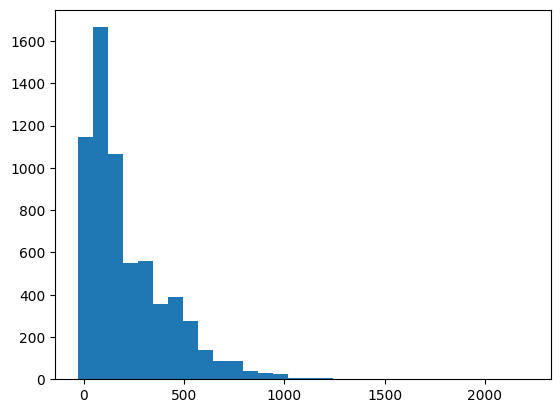

In [5]:
# Discrétisation en quantile : afficher les bornes et les effectifs & tracer de l'histogramme
tme1.discretisation_histogramme(d,n=30)


## histogramme (bis)
Tracer l'histogramme des prix au km

bornes=[0.       0.015625 0.03125  0.046875 0.0625   0.078125 0.09375  0.109375
 0.125    0.140625 0.15625  0.171875 0.1875   0.203125 0.21875  0.234375
 0.25     0.265625 0.28125  0.296875 0.3125   0.328125 0.34375  0.359375
 0.375    0.390625 0.40625  0.421875 0.4375   0.453125 0.46875  0.484375
 0.5      0.515625 0.53125  0.546875 0.5625   0.578125 0.59375  0.609375
 0.625    0.640625 0.65625  0.671875 0.6875   0.703125 0.71875 ],
effectifs=[6420 6382 6282 4935  975   57   13    6    4    3    3    2    1    1
    1    1    2    2    2    2    2    2    1    0    0    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    0
    0    0    0    0]


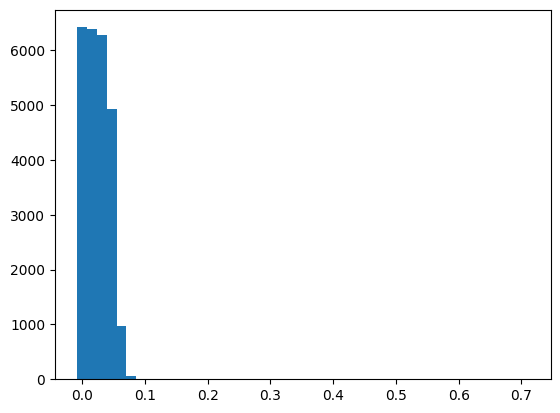

In [6]:
# histogramme des prix au km
tme1.discretisation_prix_au_km(data,n=40)

# Distributions jointes, distributions conditionnelles

Nous voulons maintenant étudier la distribution jointe entre la distance et la marque de la voiture. Partir des distributions discrètes ou discétisées et construire le tableau d'effectif puis normaliser par les effectifs de l'échantillon pour estimer la loi jointe.

Il est diffile d'analyser cette probabilité jointe (cf ci-dessous pour l'affichage)... Nous allons donc passer à la loi conditionnelle: nous voulons donc calculer la probabilité de la distance conditionnellement à la marque de la voiture.

1. Proposer un critère rapide pour vérifier que votre distribution conditionnelle respecte bien les propriétés de base
1. Cette distribution conditionnelle fait apparaitre des pics très marqués: pouvons-nous tirer parti de ces informations?

**Note:** 
- pour afficher une matrice `p_dm`, la meilleure solution est la suivante:
> `plt.imshow(p_dm, interpolation='nearest')`
>
> `plt.show()`
- la variable `marque` est bruitée. Vous pourrez vous amuser à éliminer ou fusionner certaines catégories
- les indices dans une matrice doivent toujours être entiers. `int(...)`
- pour ajouter une description sur l'axe des x:
```python
fig, ax = plt.subplots(1,1)
plt.imshow(p_dsm, interpolation='nearest')
ax.set_xticks(np.arange(len(dico_marques)))
ax.set_xticklabels(dico_marques.keys(),rotation=90,fontsize=8)
plt.show()
```
- Si l'image est trop petite pour voir quelque chose: solution = sauvegarde en pdf (ie vectorielle) + ouverture avec un logiciel de lecture pdf
```python
plt.savefig('mafigure.pdf')
```



distance discrétisée : [1. 2. 0. ... 0. 2. 2.]


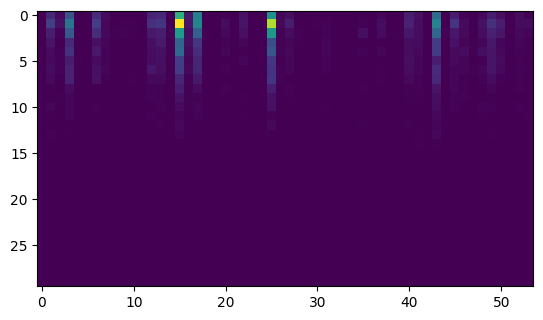

In [7]:
# loi jointe distance / marque
# 1- construction de la distance discrétisée
# Dimensions : = (Nind x 1) = mêmes dimensions que d
# contenu = catégorie de distance (entre 0 et 29 par exemple si on a discrétisé en 30 catégories)
# 2- remplissage avec np.where
# 3- remplissage de la matrice p_dm = double boucle + comptage
# 4- normalisation
# 5- affichage du résultat
# 6- retourne la loi jointe
jointe_dm=tme1.loi_jointe_distance_marque(data,30,dico_marques)


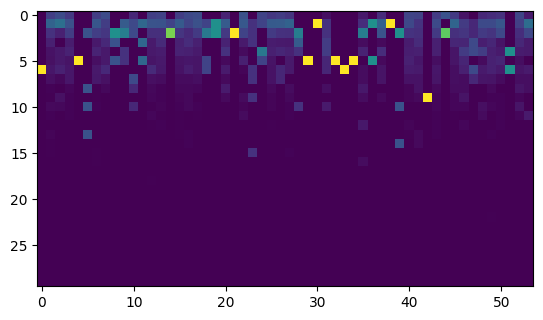

tme1.check_conditionnelle(conditionnelle_dm)=True
tme1.check_conditionnelle(jointe_dm)=False


In [8]:
# loi conditionnelle distance | marque
# à partir de la loi jointe calculée ci_dessus (jointe_dm)
# 1- c1alcul d'une marginale
# 2- calcul de la conditionnelle
# 3- affichage
# 4- retourne la loi conditionnelle
conditionnelle_dm=tme1.loi_conditionnelle(jointe_dm)
# proposition d'un critère très rapide pour vérifier qu'il s'agit bien d'une distribution conditionnelle
# toutes les distributions de distance (sachant m) doivent sommées à 1
print(f"{tme1.check_conditionnelle(conditionnelle_dm)=}") # rend True
print(f"{tme1.check_conditionnelle(jointe_dm)=}") # rend False

## Tracé de l'ensemble de l'échantillon avec des codes couleurs

Nous proposons ensuite de tracer toutes les trajectoires des voitures blablacar. Pour cela, il faut utiliser la commande `plt.plot`.
Vous devez optenir des étoiles à partir des 7 villes requêtes: `['Paris', 'Marseille', 'Grenoble', 'Lille', 'Strasbourg', 'Nantes', 'Bordeaux']`.
Mais on ne voit pas grand chose... Et ça prend beaucoup de temps à tracer avec une boucle for. On propose donc une série d'exercice pour mieux comprendre ce qui se passe.
1. Attention à l'ordre des arguments dans le plot:
```plt.plot(tous_les_x, tous_les_y)```
Afin de tracer des trajectoires, il faut envoyer les x et les y 2 par 2 dans une boucle `for`
1. Pour éviter les boucles, il existe une méthode `quiver` dédiée au tracé de champs de vecteurs: ça ira beaucoup plus vite qu'avec plot. Il faut juste bien comprendre les mécanismes d'échelles. Pour utiliser l'échelle 1, la commande est la suivante:
```python
plt.quiver(x_dep, y_dep, delta_x, delta_y,\
            angles='xy', scale_units='xy', scale=1)
```
1. Isoler les trajets proposés à partir de chacune des villes sachant les coordonnées sont:
```python
coord = np.array([[45.18721767,  5.72345183],
 [47.22572172, -1.56558993],
 [50.63010695,  3.07071992],
 [48.5782548,   7.74078742],
 [44.83848889, -0.58156509],
 [43.2991509,   5.38925024],
 [48.8477201,   2.34607889]])
```
Chaque trajectoire (point de départ) sera rattachée à la ville la plus proche.
Une fois la distance calculée pour chaque origine de trajectoire, vous pourrez avoir besoin de `argmin`
1. Tracer les trajets d'une couleur spéciale en fonction des origines. 

Les commandes matplotlib attendent des instructions de couleur au format RGB ou avec des lettres. Je vous propose une solution élégante pour distinguer les villes.
 - soit l'index de la ville la plus proche sotcké dans `ville_or` (0,...,7)
 - construire le dictionnaire: `dict({0:'b', 1:'r', 2:'k', 3:'y', 4:'c', 5:'m', 6:'g'})`
 - transformer `ville_or` en `ville_c` en vectorisant l'appel à la table de hash:
```python
ville_c = np.vectorize(dico.get)(ville_or)
```

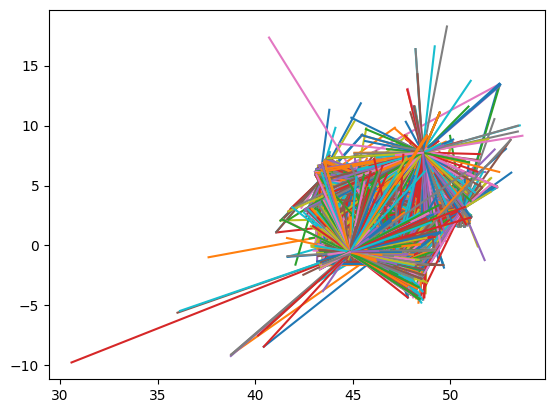

In [9]:
# tracé de l'ensemble des trajectoires avec un code couleur en fonction de la ville de départ
tme1.trace_trajectoires(data)

In [10]:
# QUESTION NON POSEE
# trouver les centres des villes
import sklearn.cluster as sk

mod = sk.KMeans(n_clusters=7,n_init=10)
mod.fit(data[:,6:8])

print(mod.cluster_centers_)

[[45.18721767  5.72345183]
 [44.83848889 -0.58156509]
 [50.63010695  3.07071992]
 [48.5782548   7.74078742]
 [47.22572172 -1.56558993]
 [43.2991509   5.38925024]
 [48.8477201   2.34607889]]


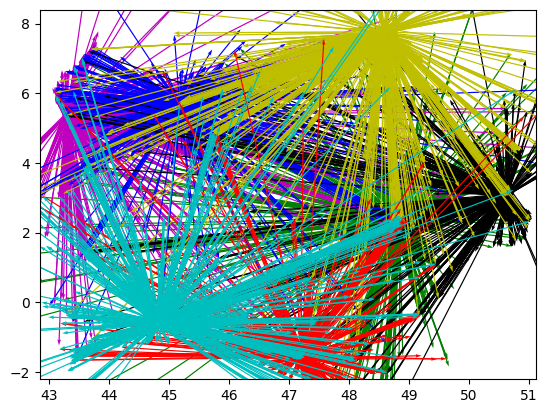

In [11]:
# trouver l'information sur la ville la plus proche
coord = np.array([[45.18721767, 5.72345183],
                  [47.22572172, -1.56558993],
                  [50.63010695, 3.07071992],
                  [48.5782548, 7.74078742],
                  [44.83848889, -0.58156509],
                  [43.2991509, 5.38925024],
                  [48.8477201, 2.34607889]])

# calcul de la matrice de distance
matrice_dist = tme1.calcule_matrice_distance(data,coord)

# indice de la ville d'origine du trajet (plus petite distance dans le tableau ci-dessus)
ville_coord_plus_proche = tme1.calcule_coord_plus_proche(matrice_dist)

# astuce pour construire une correspondance indice => code couleur
dico = dict({0:'b', 1:'r', 2:'k', 3:'y', 4:'c', 5:'m', 6:'g'})
ville_c = np.vectorize(dico.get)(ville_coord_plus_proche)

tme1.trace_ville_coord_plus_proche(data,ville_c)

## Etude de la corrélation entre variables

On propose d'étudier la corrélation entre la distance du trajet et le nombre d'étoiles de confort. Attention, les étoiles ne sont pas toujours renseignées (-1 = inconnu). On fera aussi ces opérations entre la distance et le prix.

1. Tracer dans le plan les coordonnées (distance,etoile) pour les points concernés

Vous utiliserez la commande `scatter` pour réaliser l'opération
1. Calculer le coefficient de corrélation entre les deux variables aléatoires


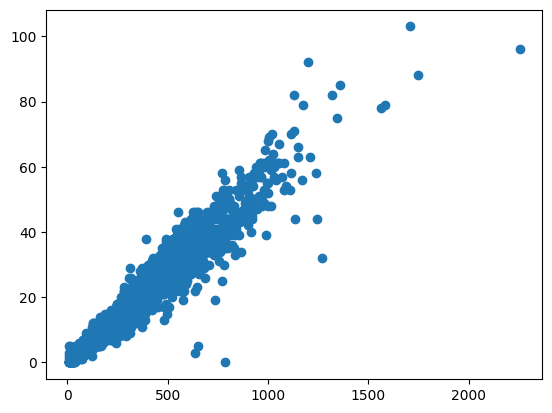

corrélation distance/prix : 0.9730132507308353


In [12]:
#  test de corrélation entre la distance et le prix
cor=tme1.test_correlation_distance_prix(data)
print(f"corrélation distance/prix : {cor}")

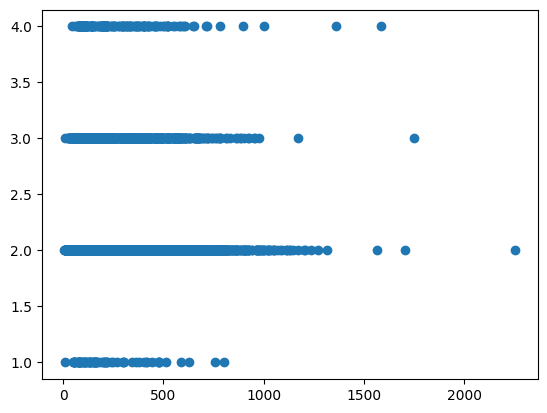

corrélation distance/confort : 0.04877552371941461


In [13]:
# test de corrélation entre la distance et le confort de la voiture
# ATTENTION : calcul uniquement pour tous les points admissibles
# (ceux pour lesquels les étoiles sont renseignées)
cor=tme1.test_correlation_distance_confort(data)
print(f"corrélation distance/confort : {cor}")

## Quelques questions supplémentaires

### prix au kilomètre en fonction de l'origine
On s'interroge sur le prix des courses en fonction des villes de départ. On ne veut pas tomber dans des pièges liés à des résumés
simplistes, nous allons donc calculer la distribution conditionnlle P(prix_km|ville_origine).
1. Calculer le prix au km
2. Discrétiser
3. Calculer (par simple comptage) la loi jointe
4. Afficher la loi conditionnelle
   
En l'état, nous avons du mal à analyser les données. Ceci est du aux valeurs extrêmes (notamment hautes). Afin de rendre l'analyse
robuste, seuiller le prix au km au 99ème percentile (toutes les valeurs supérieures sont ramenées à cette valeur limite).


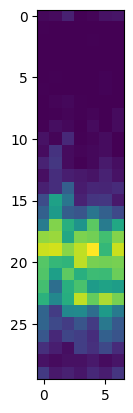

In [14]:
pmk=tme1.calcule_prix_km_seuillée(data,quantile=0.99)
pmk_discretise=tme1.discretisation(pmk,nintervalles=30, eps=1e-6) # attention il faut renforcer le max par max+eps pour plus
jointe=tme1.loi_jointe(pmk_discretise,ville_coord_plus_proche)
condi=tme1.loi_conditionnelle(jointe)

## même analyse pour voir dans quelle ville les gens sont plus matinaux, s'ils partent plus vers le sud ou le nord, l'est ou l'ouest...

Si vous étiez un journaliste en manque de sujet de reportage, quel(s) graphique(s) calculeriez vous à partir de ces données?